In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sklearn import preprocessing
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\casper1\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
dataset = pd.read_csv("C:\\Users\\casper1\\Desktop\\dataset2.csv")
dataset.head()
dataset.info()
dataset.dtypes
dataset.describe()
dataset.shape

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


(1470, 35)

In [4]:
#IQR methodu
num_dataset = dataset.select_dtypes(include=["number"])
num_dataset.dtypes
cat_dataset = dataset.select_dtypes(exclude=["number"])
cat_dataset.dtypes

#formüldeki oran
Q1 = num_dataset.quantile(0.15)
Q3 = num_dataset.quantile(0.85)
IQR = Q3 - Q1
print(IQR)
print((num_dataset < (Q1 - 1.5 * IQR)) | (num_dataset > (Q3 + 1.5 * IQR)))
idx = ((num_dataset < (Q1 - 1.5 * IQR)) | (num_dataset > (Q3 + 1.5 * IQR))).any(axis=1)
idx.value_counts()
dataset_cleaned = dataset [~((num_dataset < (Q1 - 1.5 * IQR)) | (num_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cleaned.shape

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

Age                            19.00
DailyRate                     978.65
DistanceFromHome               18.00
Education                       2.00
EmployeeCount                   0.00
EmployeeNumber               1447.30
EnvironmentSatisfaction         3.00
HourlyRate                     48.00
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 3.00
MonthlyIncome                8451.10
MonthlyRate                 17190.45
NumCompaniesWorked              5.00
PercentSalaryHike               8.00
PerformanceRating               1.00
RelationshipSatisfaction        3.00
StandardHours                   0.00
StockOptionLevel                2.00
TotalWorkingYears              16.00
TrainingTimesLastYear           2.00
WorkLifeBalance                 1.00
YearsAtCompany                  9.00
YearsInCurrentRole              8.00
YearsSinceLastPromotion         5.00
YearsWithCurrManager            8.00
dtype: float64
        Age  DailyRate 

False    1419
True       51
dtype: int64

(1419, 35)

In [5]:
d = {'No': 0, 'Yes': 1}
dataset_cleaned['Attrition'] = dataset_cleaned['Attrition'].map(d).fillna(dataset_cleaned['Attrition'])
dataset_cleaned['Attrition'].astype(int)
dataset_final = pd.get_dummies(dataset_cleaned , drop_first=True)
dataset_final.columns

y = dataset_final['Attrition'] 
X = dataset_final.drop(columns = ['Attrition']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

C:\Users\casper1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
30      0
       ..
1440    0
1441    0
1442    1
1443    0
1444    1
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    1
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    1
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1419, dtype: int32

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing 

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

C:\Users\casper1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([[291,   2],
       [ 40,  22]], dtype=int64)

([<matplotlib.axis.XTick at 0x1ddef6c8550>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1ddef6d3390>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

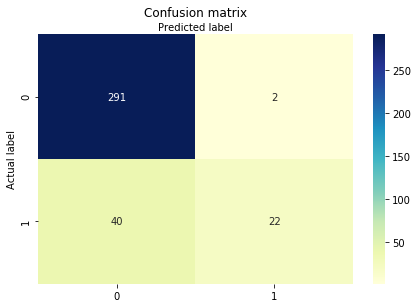

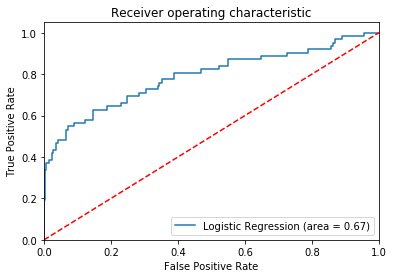

Accuracy: 0.8816901408450705
Precision: 0.9166666666666666
Recall: 0.3548387096774194


In [7]:
#Confusion Matrix 
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()


#Accuracy, Precision and Recall 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy of max_depth1 0.8253521126760563
Accuracy of max_depth2 0.8366197183098592
Accuracy of max_depth3 0.8366197183098592
Accuracy of max_depth4 0.8140845070422535
Accuracy of max_depth5 0.7971830985915493
Accuracy of max_depth6 0.7971830985915493
Accuracy of max_depth7 0.7830985915492957
Accuracy of max_depth8 0.7661971830985915
Accuracy of max_depth9 0.7718309859154929


array([[289,   4],
       [ 54,   8]], dtype=int64)

([<matplotlib.axis.XTick at 0x1ddef872588>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1ddef8502e8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

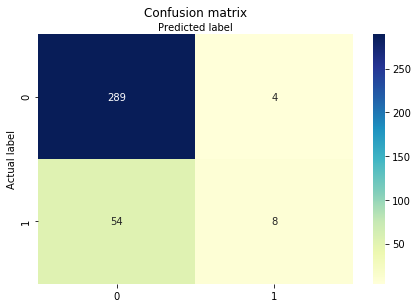

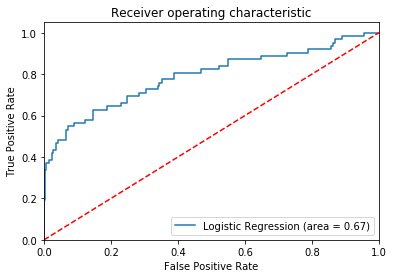

Accuracy: 0.8366197183098592
Precision: 0.6666666666666666
Recall: 0.12903225806451613


True

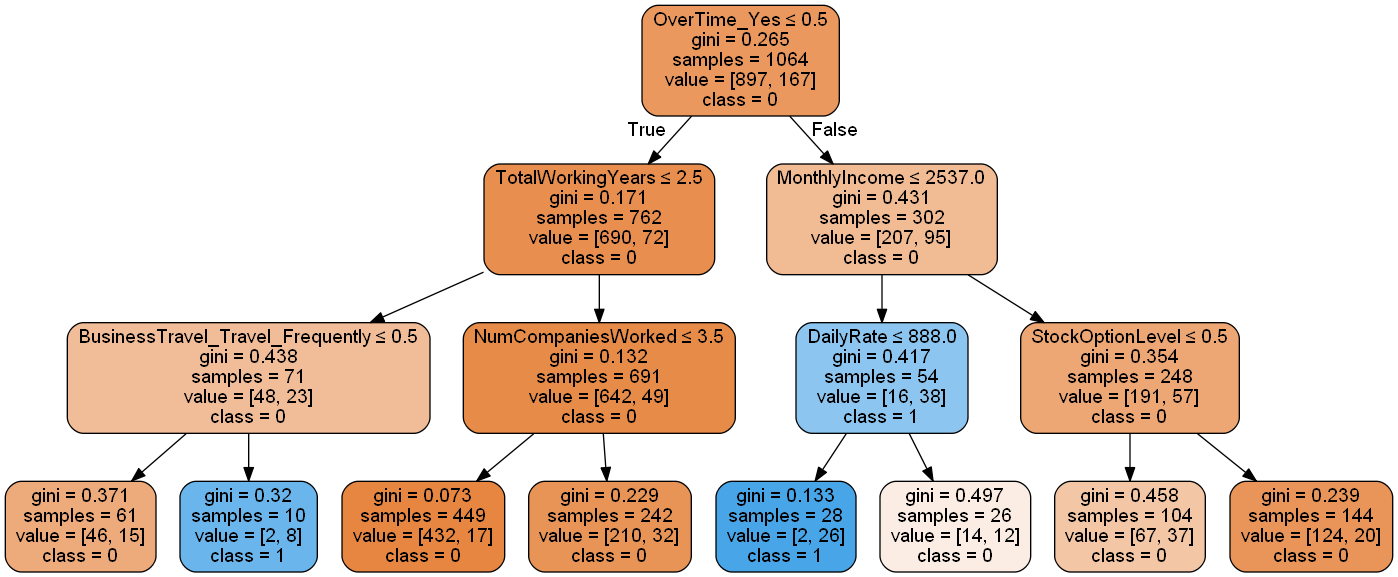

In [8]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of max_depth" +str(depth) ,metrics.accuracy_score(y_test, y_pred))


clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



#Confusion Matrix 
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()


#Accuracy, Precision and Recall 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('online_shoppers_intention1.png')
Image(graph.create_png())


In [13]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth , criterion='entropy')
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of max_depth" +str(depth) ,metrics.accuracy_score(y_test, y_pred))


clf = DecisionTreeClassifier(max_depth=3 ,criterion='entropy')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy of max_depth1 0.8253521126760563
Accuracy of max_depth2 0.8366197183098592
Accuracy of max_depth3 0.8394366197183099
Accuracy of max_depth4 0.8338028169014085
Accuracy of max_depth5 0.828169014084507
Accuracy of max_depth6 0.8253521126760563
Accuracy of max_depth7 0.8056338028169014
Accuracy of max_depth8 0.8140845070422535
Accuracy of max_depth9 0.7830985915492957


array([[291,   2],
       [ 55,   7]], dtype=int64)

([<matplotlib.axis.XTick at 0x1ddefd5a518>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1ddf0d31860>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

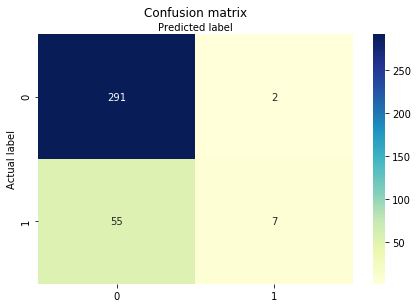

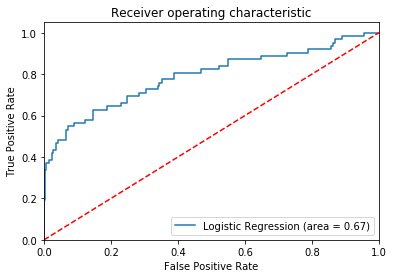

Accuracy: 0.8394366197183099
Precision: 0.7777777777777778
Recall: 0.11290322580645161


True

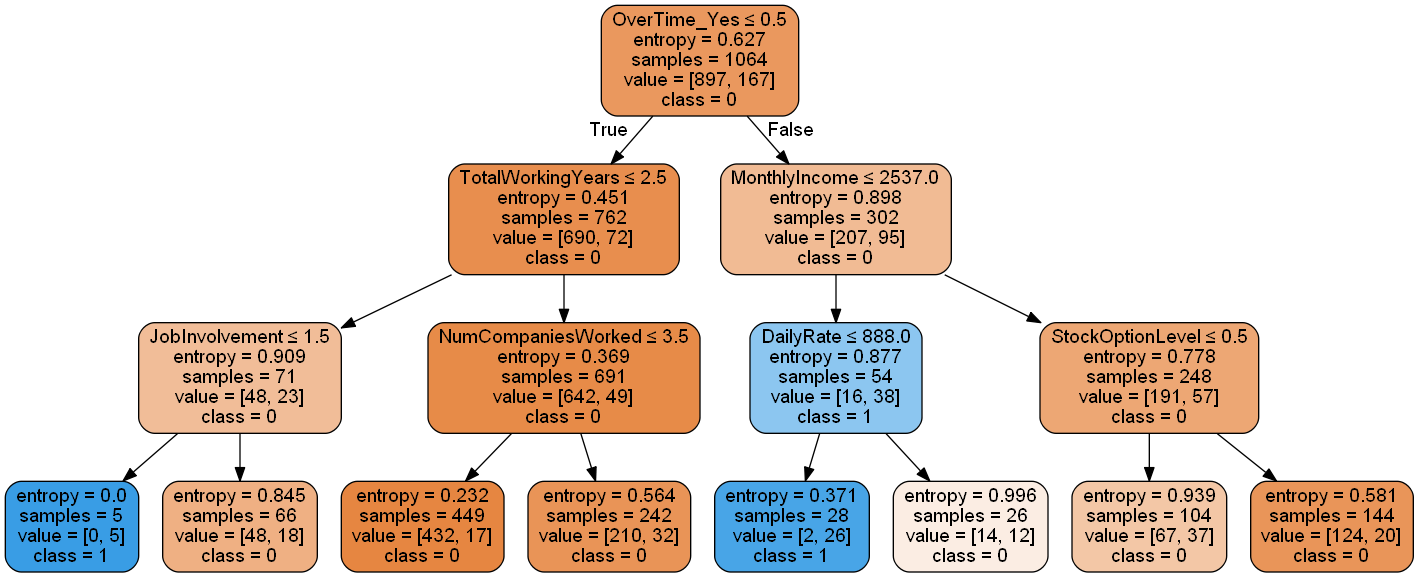

In [14]:
#Confusion Matrix 
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

#Accuracy, Precision and Recall 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('online_shoppers_intention1.png')
Image(graph.create_png())


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

y_train_pred = rfc.predict(X_train)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

C:\Users\casper1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

array([[291,   2],
       [ 54,   8]], dtype=int64)

([<matplotlib.axis.XTick at 0x1ddefca9710>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1ddefcb0470>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

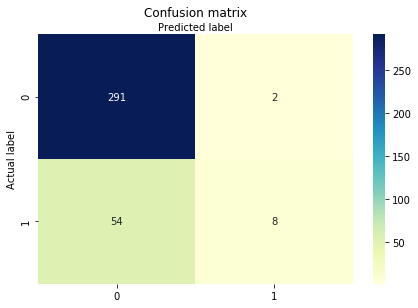

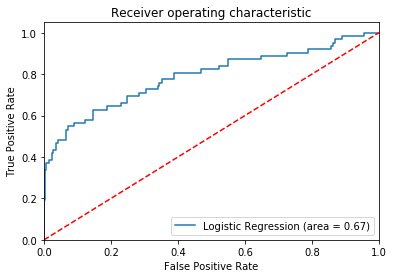

Accuracy: 0.8422535211267606
Precision: 0.8
Recall: 0.12903225806451613


In [12]:
#Confusion Matrix

class_names=[0,1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)

plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")

plt.tight_layout()

plt.title('Confusion matrix', y=1.1)

plt.ylabel('Actual label')

plt.xlabel('Predicted label')


#ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

#Accuracy, Precision and Recall 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
